In [4]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
samsung = fdr.DataReader('005930','2022')
print(samsung)

             Open   High    Low  Close    Volume    Change
Date                                                      
2022-01-03  79400  79800  78200  78600  13502112  0.003831
2022-01-04  78800  79200  78300  78700  12427416  0.001272
2022-01-05  78800  79000  76400  77400  25470640 -0.016518
2022-01-06  76700  77600  76600  76900  12931954 -0.006460
2022-01-07  78100  78400  77400  78300  15163757  0.018205
...           ...    ...    ...    ...       ...       ...
2023-07-27  69900  71700  69300  71700  24261179  0.027221
2023-07-28  71800  72400  70100  70600  19420683 -0.015342
2023-07-31  70900  71000  69800  69800  13035420 -0.011331
2023-08-01  70100  71200  70000  71100  12299254  0.018625
2023-08-02  70700  71000  69800  69900  13285812 -0.016878

[392 rows x 6 columns]


In [28]:
openValues = samsung[['Open']]
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(openValues)

In [29]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE] #전체건수 -200
test_data = scaled[-TEST_SIZE:]
print(len(train_data))

192


In [30]:
def make_sample(data,window):
    train = []
    target = []
    #데이터를 30개씩 묶어서 합친다.
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train),np.array(target)
X_train, y_train = make_sample(train_data,30)
print(len(y_train))

162


In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1],1),
               activation='tanh',
               return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
model.fit(X_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
11/11 [==============================] - 1s 10ms/step - loss: 0.0618
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0058
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 11/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 12/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/100
11/11 [================

In [34]:
X_test,y_test = make_sample(test_data,30)
print(len(X_test))
pred = model.predict(X_test)

170
6/6 [==============================] - 0s 2ms/step


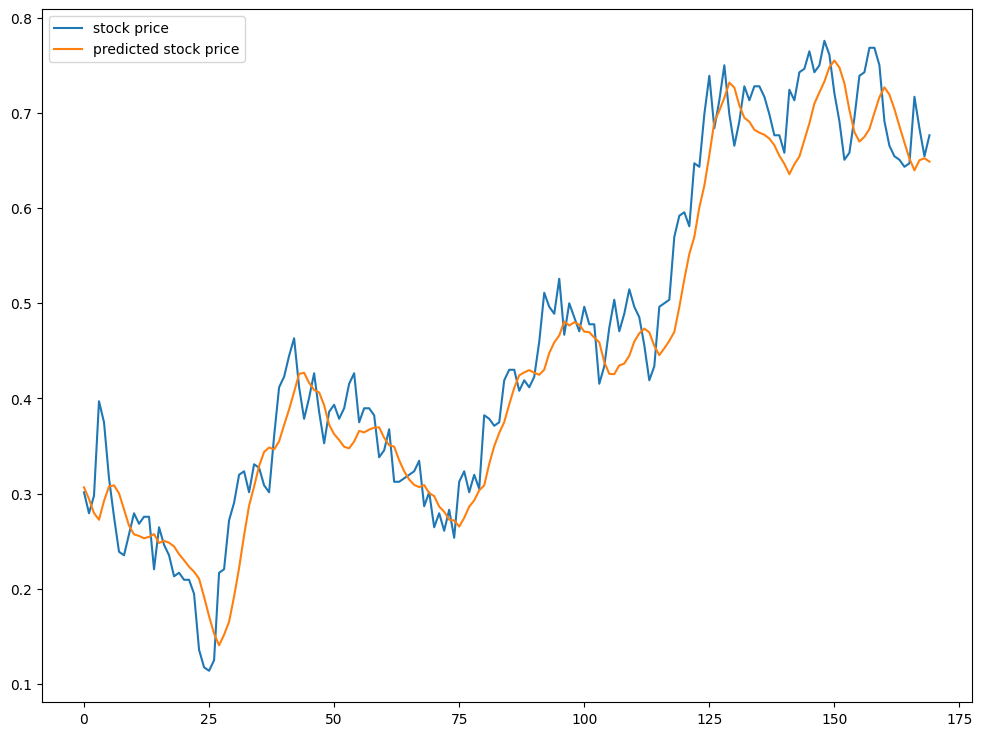

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(y_test,label='stock price')
plt.plot(pred,label='predicted stock price')
plt.legend()
plt.show()